In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from plotly import tools
import plotly_express as px
from plotly.offline import init_notebook_mode,iplot,plot
import plotly.figure_factory as ff
import plotly.graph_objs as go
import ast

In [95]:
df = pd.read_csv("tv_rating.csv")
df

,title,rating,stars
0,将军家的小狐仙,3.6分,主演：内详
1,花府小姐要出逃,2.1分,主演：董岩磊
2,爱的厘米,3.6分,"主演：佟丽娅,佟大为,许娣,韩童生,檀健次,郑合惠子,左小青,涂松岩,胡可,任正斌,姜妍,盖克"
3,天道,4.0分,主演：王志文/左小青/曾红生/赵会南/施大生/姚金飞/
4,传闻中的陈芊芊,4.4分,"主演：赵露思,丁禹兮,盛英豪,周紫馨,权沛伦,陈名豪"
...,...,...,...
4595,大南迁,2.0分,"主演：俞飞鸿,邹兆龙,梁家仁,汤镇业,贺刚,王小虎,韩烨"
4596,唐人街探案(电视剧),5.0分,"主演：邱泽,张钧甯,王真儿,陈哲远"
4597,龙行天下,3.0分,"主演：王灿,曾安琪,周明增,吴浩升"
4598,76号恐怖书店：恐惧罐头,3.0分,"主演：小熏,赖澔哲,廖钦亮,白润音"


In [96]:
df.isna().sum()

title     0
rating    0
stars     0
dtype: int64

In [97]:
df.rating = df.rating.apply(lambda x: x.replace("分", ""))
df.rating = pd.to_numeric(df.rating)
df

,title,rating,stars
0,将军家的小狐仙,3.6,主演：内详
1,花府小姐要出逃,2.1,主演：董岩磊
2,爱的厘米,3.6,"主演：佟丽娅,佟大为,许娣,韩童生,檀健次,郑合惠子,左小青,涂松岩,胡可,任正斌,姜妍,盖克"
3,天道,4.0,主演：王志文/左小青/曾红生/赵会南/施大生/姚金飞/
4,传闻中的陈芊芊,4.4,"主演：赵露思,丁禹兮,盛英豪,周紫馨,权沛伦,陈名豪"
...,...,...,...
4595,大南迁,2.0,"主演：俞飞鸿,邹兆龙,梁家仁,汤镇业,贺刚,王小虎,韩烨"
4596,唐人街探案(电视剧),5.0,"主演：邱泽,张钧甯,王真儿,陈哲远"
4597,龙行天下,3.0,"主演：王灿,曾安琪,周明增,吴浩升"
4598,76号恐怖书店：恐惧罐头,3.0,"主演：小熏,赖澔哲,廖钦亮,白润音"


In [98]:
def handleStars(stars):
    stars = stars.replace("主演：", "")
    result_arr = []
    result_arr = stars.split(",")
    return result_arr
df.stars = df.stars.apply(handleStars)
df

,title,rating,stars
0,将军家的小狐仙,3.6,[内详]
1,花府小姐要出逃,2.1,[董岩磊]
2,爱的厘米,3.6,"[佟丽娅, 佟大为, 许娣, 韩童生, 檀健次, 郑合惠子, 左小青, 涂松岩, 胡可, 任..."
3,天道,4.0,[王志文/左小青/曾红生/赵会南/施大生/姚金飞/]
4,传闻中的陈芊芊,4.4,"[赵露思, 丁禹兮, 盛英豪, 周紫馨, 权沛伦, 陈名豪]"
...,...,...,...
4595,大南迁,2.0,"[俞飞鸿, 邹兆龙, 梁家仁, 汤镇业, 贺刚, 王小虎, 韩烨]"
4596,唐人街探案(电视剧),5.0,"[邱泽, 张钧甯, 王真儿, 陈哲远]"
4597,龙行天下,3.0,"[王灿, 曾安琪, 周明增, 吴浩升]"
4598,76号恐怖书店：恐惧罐头,3.0,"[小熏, 赖澔哲, 廖钦亮, 白润音]"


In [99]:
df

,title,rating,stars
0,将军家的小狐仙,3.6,[内详]
1,花府小姐要出逃,2.1,[董岩磊]
2,爱的厘米,3.6,"[佟丽娅, 佟大为, 许娣, 韩童生, 檀健次, 郑合惠子, 左小青, 涂松岩, 胡可, 任..."
3,天道,4.0,[王志文/左小青/曾红生/赵会南/施大生/姚金飞/]
4,传闻中的陈芊芊,4.4,"[赵露思, 丁禹兮, 盛英豪, 周紫馨, 权沛伦, 陈名豪]"
...,...,...,...
4595,大南迁,2.0,"[俞飞鸿, 邹兆龙, 梁家仁, 汤镇业, 贺刚, 王小虎, 韩烨]"
4596,唐人街探案(电视剧),5.0,"[邱泽, 张钧甯, 王真儿, 陈哲远]"
4597,龙行天下,3.0,"[王灿, 曾安琪, 周明增, 吴浩升]"
4598,76号恐怖书店：恐惧罐头,3.0,"[小熏, 赖澔哲, 廖钦亮, 白润音]"


In [100]:
df["star_count"] = df.stars.apply(len)
df

,title,rating,stars,star_count
0,将军家的小狐仙,3.6,[内详],1
1,花府小姐要出逃,2.1,[董岩磊],1
2,爱的厘米,3.6,"[佟丽娅, 佟大为, 许娣, 韩童生, 檀健次, 郑合惠子, 左小青, 涂松岩, 胡可, 任...",12
3,天道,4.0,[王志文/左小青/曾红生/赵会南/施大生/姚金飞/],1
4,传闻中的陈芊芊,4.4,"[赵露思, 丁禹兮, 盛英豪, 周紫馨, 权沛伦, 陈名豪]",6
...,...,...,...,...
4595,大南迁,2.0,"[俞飞鸿, 邹兆龙, 梁家仁, 汤镇业, 贺刚, 王小虎, 韩烨]",7
4596,唐人街探案(电视剧),5.0,"[邱泽, 张钧甯, 王真儿, 陈哲远]",4
4597,龙行天下,3.0,"[王灿, 曾安琪, 周明增, 吴浩升]",4
4598,76号恐怖书店：恐惧罐头,3.0,"[小熏, 赖澔哲, 廖钦亮, 白润音]",4


In [101]:
df[df.star_count==1].stars

0                               [内详]
1                              [董岩磊]
3         [王志文/左小青/曾红生/赵会南/施大生/姚金飞/]
16                    [刘畅、淮文、文生、邱赫南]
17      [许凯、李一桐、檀健次、吴佳怡、范世錡、李泽锋、蒋梦婕]
                    ...             
4557      [王志文/左小青/曾红生/赵会南/施大生/姚金飞/]
4575                [郭德纲 / 陈乔恩 / 于谦]
4587                            [内详]
4594                   [于霖  严米拉  柳璐]
4599                            [内详]
Name: stars, Length: 801, dtype: object

In [102]:
df[df.star_count==1][100:150]

,title,rating,stars,star_count
509,天道,4.0,[王志文/左小青/曾红生/赵会南/施大生/姚金飞/],1
520,乌龙变形记,5.0,[内详],1
529,绝色小甜妻,2.0,[团团 文鸿毅 王宏博 朱晓娟],1
546,天使在人间,1.0,[马跃],1
552,将军家的小狐仙,3.6,[内详],1
553,花府小姐要出逃,2.1,[董岩磊],1
555,天道,4.0,[王志文/左小青/曾红生/赵会南/施大生/姚金飞/],1
564,职人访谈录 第一季,1.0,[王耀庆],1
565,新疆味道,5.0,[内详],1
566,攀云,4.0,[MAIZI AMY VIVIAN LINGSANG ADA],1


In [103]:
def handleStarStep2(stars):
    spliters = [' ','/', ',','、']
    result_arr = []
    for item in stars:
        for spliter in spliters:
            temp_arr = item.split(spliter)
            for sub_item in temp_arr:
                temp_item = sub_item.strip()
                if temp_item not in result_arr:
                    result_arr.append(temp_item)
    return result_arr
df.stars = df.stars.apply(handleStarStep2)
df

,title,rating,stars,star_count
0,将军家的小狐仙,3.6,[内详],1
1,花府小姐要出逃,2.1,[董岩磊],1
2,爱的厘米,3.6,"[佟丽娅, 佟大为, 许娣, 韩童生, 檀健次, 郑合惠子, 左小青, 涂松岩, 胡可, 任...",12
3,天道,4.0,"[王志文/左小青/曾红生/赵会南/施大生/姚金飞/, 王志文, 左小青, 曾红生, 赵会南,...",1
4,传闻中的陈芊芊,4.4,"[赵露思, 丁禹兮, 盛英豪, 周紫馨, 权沛伦, 陈名豪]",6
...,...,...,...,...
4595,大南迁,2.0,"[俞飞鸿, 邹兆龙, 梁家仁, 汤镇业, 贺刚, 王小虎, 韩烨]",7
4596,唐人街探案(电视剧),5.0,"[邱泽, 张钧甯, 王真儿, 陈哲远]",4
4597,龙行天下,3.0,"[王灿, 曾安琪, 周明增, 吴浩升]",4
4598,76号恐怖书店：恐惧罐头,3.0,"[小熏, 赖澔哲, 廖钦亮, 白润音]",4


In [104]:
df["star_count"] = df.stars.apply(len)
df[df.star_count ==1]

,title,rating,stars,star_count
0,将军家的小狐仙,3.6,[内详],1
1,花府小姐要出逃,2.1,[董岩磊],1
29,颠簸货运路,3.0,[内详],1
30,真相,2.0,[内详],1
45,我的极品老婆,3.0,[张小帅],1
...,...,...,...,...
4546,魔道祖师Q,3.5,[内详],1
4554,将军家的小狐仙,3.6,[内详],1
4555,花府小姐要出逃,2.1,[董岩磊],1
4587,萌妃探案记,3.0,[内详],1


<AxesSubplot:>

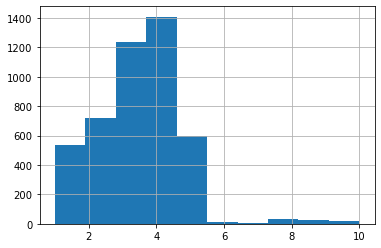

In [105]:
df.rating.hist()

<AxesSubplot:>

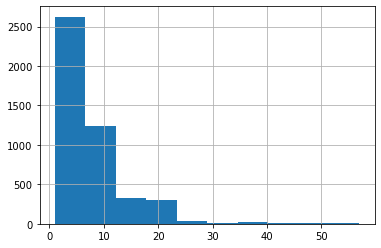

In [106]:
df.star_count.hist()

In [107]:
df["title_len"] = df.title.apply(len)
px.scatter(df, x = "title_len", y = "rating")

In [108]:
px.scatter(df,x="star_count",y="rating")

In [109]:
df_train,df_test = train_test_split(df,test_size=0.2)
df_test

,title,rating,stars,star_count,title_len
606,周生如故,4.0,"[任嘉伦, 白鹿, 王星越, 李宜儒, 姚奕辰, 周陆啦, 苏梦芸, 吴曼思, 刘威葳, 梁...",14,4
2102,我在六扇门的日子,2.5,"[赵樱子, 陈信喆, 王璐鑫, 戴安娜, 恩璟]",5,8
3424,远得要命的爱情,1.0,"[朴海镇, 李菲儿, 张伦硕, 刘雨欣, 宋轶, 屈菁菁, 吴磊, 杨金承, 郑佩佩]",9,7
320,两不疑,3.0,"[宋妍霏、张昊唯、马栗、曹峻祥、于波、苗皓钧、林子璐、翁虹, 宋妍霏, 张昊唯, 马栗, 曹...",9,3
2958,飘香剑雨,3.8,"[吴优, 任言恺, 高广泽, 肖燕]",4,4
...,...,...,...,...,...
803,彼岸花,5.0,"[林允, 宋威龙, 何润东, 王耀庆, 李心艾, 谢彬彬, 冯波, 宋海颉, 辛一]",9,3
298,入侵者,4.0,"[范文芳, 李铭顺, 徐彬, 廖奕琁, 沈家玉, 林明伦, 江俊翰, 朱厚任, 张顺源, 林...",11,3
3855,良家妇女,1.0,"[马雅舒, 杜德伟, 张曦文, 庹宗华, 章申]",5,4
1735,沙海,5.0,"[吴磊, 秦昊, 张萌, 杨蓉]",4,2


In [128]:
random_result = np.random.uniform(0.0,5.0,720)
# print(random_result)
mean_squared_error(random_result,df_test["rating"])

ValueError: Found input variables with inconsistent numbers of samples: [720, 920]

In [ ]:
from xgboost import XGBRegressor
features = ["title_len","star_count"]
target = "rating"
xgb = XGBRegressor(n_estimators= 2000,random_state= 0,max_depth=27)
df_train_features = df_train[features]
df_train_target = df_train[target]
xgb.fit(df_train_features,df_train_target)
df_test_feat = df_test[features]
df_test_result = xgb.predict(df_test_feat)
mean_squared_error(df_test_result,df_test[target])

In [130]:
all_stars = {}
all_top_stars = {}
i = 0
for item in df.stars.values:
    rating = df.loc[i,"rating"]
    for sub_item  in item:
        if sub_item in all_stars:
            all_stars[sub_item] =all_stars[sub_item] +1
        else:
            all_stars[sub_item] = 1
    if rating >=4:
        if sub_item in all_top_stars:
            all_top_stars[sub_item] = all_top_stars[sub_item]+1
        else:
            all_top_stars[sub_item] =1
    i = i+1
print("普通演员个数：",len(all_stars))
print("优秀演员个数：",len(all_top_stars))         

普通演员个数： 9687
优秀演员个数： 1275


In [132]:
def get_sr_stars_count(c,l):
    result = 0
    for item in l:
        if all_stars[item]>c:
            result =result+1
    return result
def get_top_stars_count(l):
    result = 0
    for item in l:
        if item in all_top_stars:
            result = result+1
    return result
           
def get_top_stars_movie_count(l):
    result = 0
    for item in l:
        if item in all_top_stars:
            result = result+all_top_stars[item]
    return result

df["sr_stars_count"] = df.stars.apply(lambda x:get_sr_stars_count(3,x))
df["top_stars_count"] = df.stars.apply(get_top_stars_count)
df["top_stars_movie_count"] = df.stars.apply(get_top_stars_movie_count)
df
        
    

,title,rating,stars,star_count,title_len,sr_stars_count,top_stars_count,top_stars_movie_count
0,将军家的小狐仙,3.6,[内详],1,7,1,1,24
1,花府小姐要出逃,2.1,[董岩磊],1,7,1,0,0
2,爱的厘米,3.6,"[佟丽娅, 佟大为, 许娣, 韩童生, 檀健次, 郑合惠子, 左小青, 涂松岩, 胡可, 任...",12,4,12,3,5
3,天道,4.0,"[王志文/左小青/曾红生/赵会南/施大生/姚金飞/, 王志文, 左小青, 曾红生, 赵会南,...",8,2,8,2,108
4,传闻中的陈芊芊,4.4,"[赵露思, 丁禹兮, 盛英豪, 周紫馨, 权沛伦, 陈名豪]",6,7,6,1,101
...,...,...,...,...,...,...,...,...
4595,大南迁,2.0,"[俞飞鸿, 邹兆龙, 梁家仁, 汤镇业, 贺刚, 王小虎, 韩烨]",7,3,5,1,1
4596,唐人街探案(电视剧),5.0,"[邱泽, 张钧甯, 王真儿, 陈哲远]",4,10,4,2,2
4597,龙行天下,3.0,"[王灿, 曾安琪, 周明增, 吴浩升]",4,4,1,0,0
4598,76号恐怖书店：恐惧罐头,3.0,"[小熏, 赖澔哲, 廖钦亮, 白润音]",4,12,0,0,0


In [134]:
from xgboost import XGBRegressor
features = ["sr_stars_count","top_stars_count","top_stars_movie_count"]
target = "rating"
df_train,df_test = train_test_split(df,test_size=0.2)
xgb = XGBRegressor(n_estimators =2000,random_state =0,max_depth=27)
df_train_features = df_train[features]
df_train_target = df_train[target]
xgb.fit(df_train_features,df_train_target)
df_test_feat = df_test[features]
df_test_result = xgb.predict(df_test_feat)
mean_squared_error(df_test_result,df_test[target])


1.6630319655983974

现实世界的数据往往不存在明显的特征，需要我们基于现有特征不断挖掘出潜在的相关性，找出隐藏在数据背后的特征；

使用 replace 函数替换字符串中的任意字符，使用 pd.to_numeric 将某一列转换为数字；

使用 split 函数将字符串以某个分隔符为准拆成一个字符串数组；

结合经验与现有的数据，用不同的特征尝试模型的训练，最终找到最好的特征集合。